In [3]:
import ndjson
import numpy as np
# np.set_printoptions(threshold=np.inf)

coord_space_size = 400
scale_factor = 10
new_size = int(coord_space_size/scale_factor) #will be 40 if sf = 10

def load_ndjson_dataset(filename):
    with open(filename) as f:
        data = ndjson.load(f)
    return(data)

def parse_points(points):
    xMin = coord_space_size
    yMin = coord_space_size
    for point in points:
        if point[0] < xMin:
            xMin = point[0]
        if point[1] < yMin:
            yMin = point[1]
    arr = np.zeros((new_size,new_size), dtype=int)  # Initialize numpy array
    for point in points:
        x = point[0]
        y = point[1]

        x = int((x - xMin) / scale_factor);
        y = int((y - yMin) / scale_factor);

        #flip (x,y) since the android screen follows 3rd quadrant
        arr[y,x] = 1
    return(arr)
    

def parse_ndjson_data(ndjson_data):
    parsed_data = {}
    m=len(ndjson_data)
    labels=np.zeros(m, dtype=int)
    data=np.zeros((m, new_size*new_size), dtype=int)
    for index, data_row_json in enumerate(ndjson_data):
        points = data_row_json["points"]
        label = data_row_json["class"]
        parsed_points = parse_points(points)

        labels[index] = label
        data[index] = parsed_points.flatten()
    parsed_data["data"] = data
    parsed_data["labels"] = labels
    return(parsed_data)

ndjson_data = load_ndjson_dataset("data.ndjson")
doodle_data=parse_ndjson_data(ndjson_data)

## Dataset 

Each 40x40 image is represented as a 1D array of 1600 entries. There are 3 labels right now and each label has 15 instances. Hence the shape is 45x1600

In [4]:
print(doodle_data["data"].shape)

(45, 1600)


In [6]:
print(doodle_data["labels"].shape)

(45,)


## Labels

We have 3 different labels now.

### Label 1 - Circle

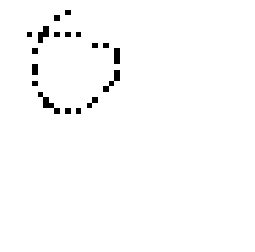

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def draw_doodle(some_doodle):
    some_doodle_image = some_doodle.reshape(40, 40)
    plt.imshow(some_doodle_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
draw_doodle(doodle_data["data"][0])

### Label 2 - V shape

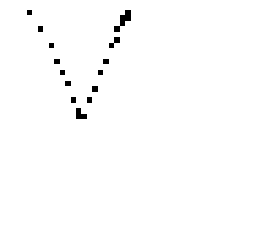

In [17]:
draw_doodle(doodle_data["data"][15])

### Label 3 - ~ shape

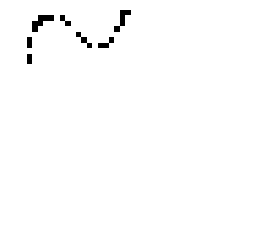

In [20]:
draw_doodle(doodle_data["data"][31])